In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
def fun(x):
    return 10 * np.cos(1.5 * np.sin(x) )

In [ ]:
X = np.linspace(0, 1, 150)
y = fun(X) + np.random.normal(loc = 0.0, scale = 1.0, size = 150)
X = X.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
polynomial_features = PolynomialFeatures(degree=18)
model = LinearRegression()
pipeline = Pipeline([('polynomial_features', polynomial_features),
                  ('linear_regression', model)])
pipeline.fit(X_train, y_train)

kf = KFold(n_splits=5)
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=kf)
scores

array([-1.66404242, -0.96687347, -0.46914832, -0.97128445, -1.65281838])

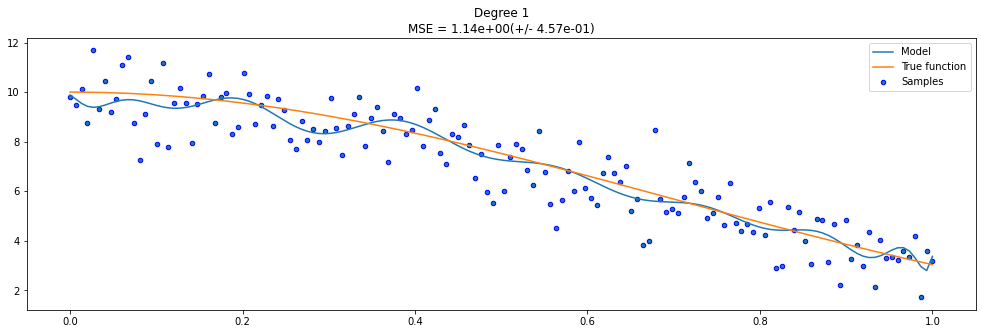

In [ ]:
plt.rcParams['figure.figsize'] = (17,5)
pipeline.predict(X_test)
cccc = np.linspace(0, 1, 150).reshape(-1, 1)

plt.plot(cccc, pipeline.predict(cccc), label='Model')
plt.plot(cccc, fun(cccc), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(1, -scores.mean(), scores.std()))
plt.show()

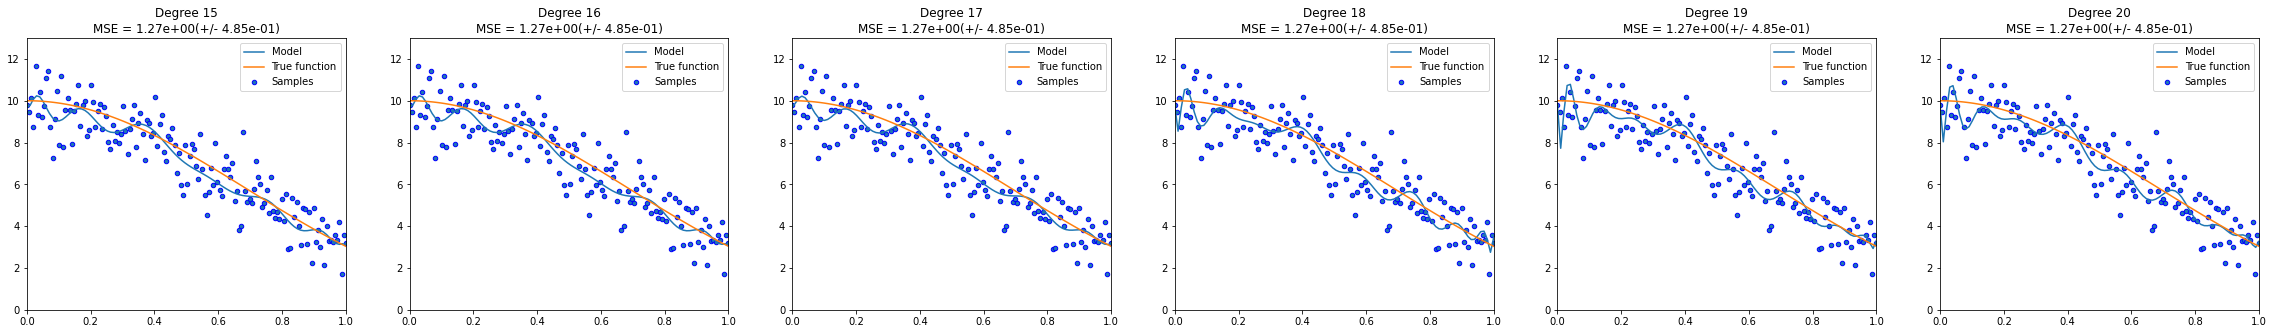

In [ ]:
plt.rcParams['figure.figsize'] = (40,5)

degrees = range(15, 21)

for i in degrees:
    ax = plt.subplot(1, len(degrees), i-15+1)

    polynomial_features = PolynomialFeatures(degree=i)
    model = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                      ('linear_regression', model)])
    pipeline.fit(X_train, y_train)

    kf = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

    test = np.linspace(0, 1, 100).reshape(-1, 1)

    plt.plot(test, pipeline.predict(test), label='Model')
    plt.plot(test, fun(test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(0, 13)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(i, -scores.mean(), scores.std()))
plt.show()

In [ ]:
params = {'polynomial_features__degree': range(15, 21), 
          'ridge__alpha': [0, 0.01, 0.1, 0.5, 1]}

model = Ridge()

kf = KFold(n_splits=5)

pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('ridge', model)])

gs = GridSearchCV(pipeline, params, scoring='neg_mean_squared_error', cv=kf)

gs.fit(X, y)
gs.best_params_

{'polynomial_features__degree': 20, 'ridge__alpha': 0.5}

In [ ]:
params = {'polynomial_features__degree': range(15, 21), 
          'lasso__alpha': [0, 0.01, 0.1, 0.5, 1]}

model = Lasso()

kf = KFold(n_splits=5)

pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('lasso', model)])

gs = GridSearchCV(pipeline, params, scoring='neg_mean_squared_error', cv=kf);

gs.fit(X, y)
gs.best_params_

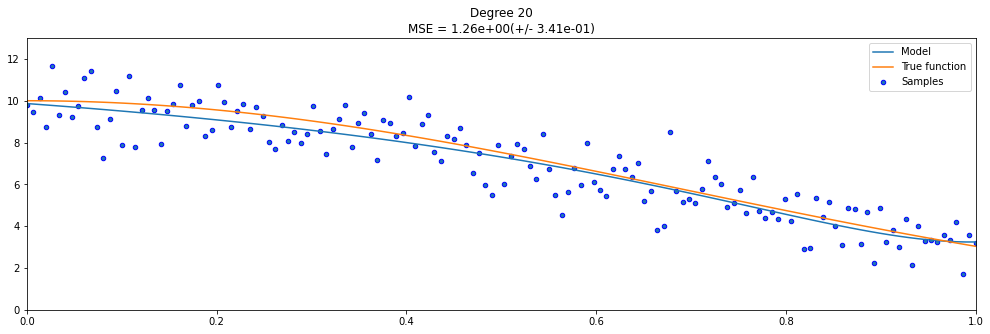

In [ ]:
plt.rcParams['figure.figsize'] = (17,5)

polynomial_features = PolynomialFeatures(degree=20)
model = Ridge(alpha=0.5)
pipeline = Pipeline([('polynomial_features', polynomial_features),
                  ('linear_regression', model)])
pipeline.fit(X_train, y_train)

kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)


test = np.linspace(0, 1, 100).reshape(-1, 1)

plt.plot(test, pipeline.predict(test), label='Model')
plt.plot(test, fun(test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(0, 13)
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(i, -scores.mean(), scores.std()))
plt.show()

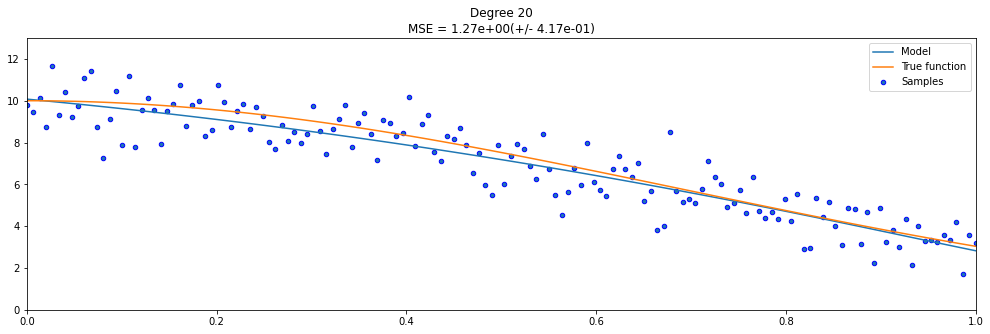

In [ ]:
plt.rcParams['figure.figsize'] = (17,5)

polynomial_features = PolynomialFeatures(degree=15)
model = Lasso(alpha=0.01)
pipeline = Pipeline([('polynomial_features', polynomial_features),
                  ('linear_regression', model)])
pipeline.fit(X_train, y_train)

kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)


test = np.linspace(0, 1, 100).reshape(-1, 1)

plt.plot(test, pipeline.predict(test), label='Model')
plt.plot(test, fun(test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(0, 13)
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(i, -scores.mean(), scores.std()))
plt.show()